Tarea 1 Procesamiento de Imagenes 
MDS 112 Sección 1

Alumno: Esteban Hernández

In [1]:
#Requerimiento 1:

import cv2
import numpy as np
import matplotlib.pyplot as plt 

__img__ = cv2.imread('img.jpg')

img = cv2.cvtColor(__img__, cv2.COLOR_BGR2RGB)
plt.imshow(img)

img.shape

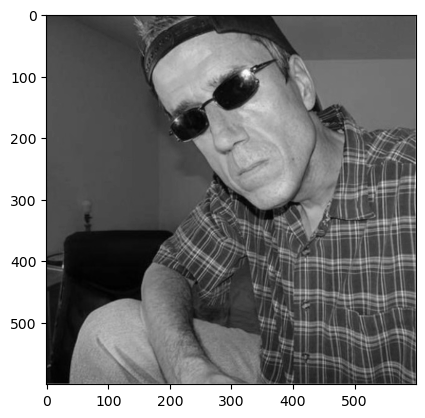

In [ ]:
#Requerimiento 2:

gris_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gris_img,cmap="gray")

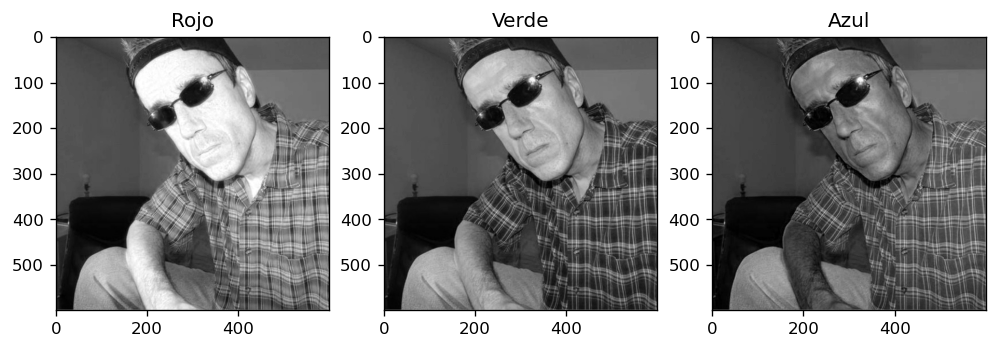

In [ ]:
#Requerimiento 3:

fig, ax = plt.subplots(nrows=1, ncols=3, dpi=120)
fig.set_size_inches(10,15)

#Dividir matriz de la imagen RGB
R_img, G_img, B_img = cv2.split(img)

RGB_dict = {
    "Rojo"  :[ax[0],R_img],
    "Verde" :[ax[1],G_img], 
    "Azul"  :[ax[2],B_img]
}
[[  
    #Mostrar cada canal en orden RGB en una figura
    RGB_dict[_canal][0].imshow(RGB_dict[_canal][1],cmap="gray"), 
    RGB_dict[_canal][0].set_title(_canal),

    #Guardar cada canal en un archivo
    cv2.imwrite(f'img_{_canal}.jpg',RGB_dict[_canal][1])

    ] for _canal in RGB_dict.keys() 
]
plt.show()

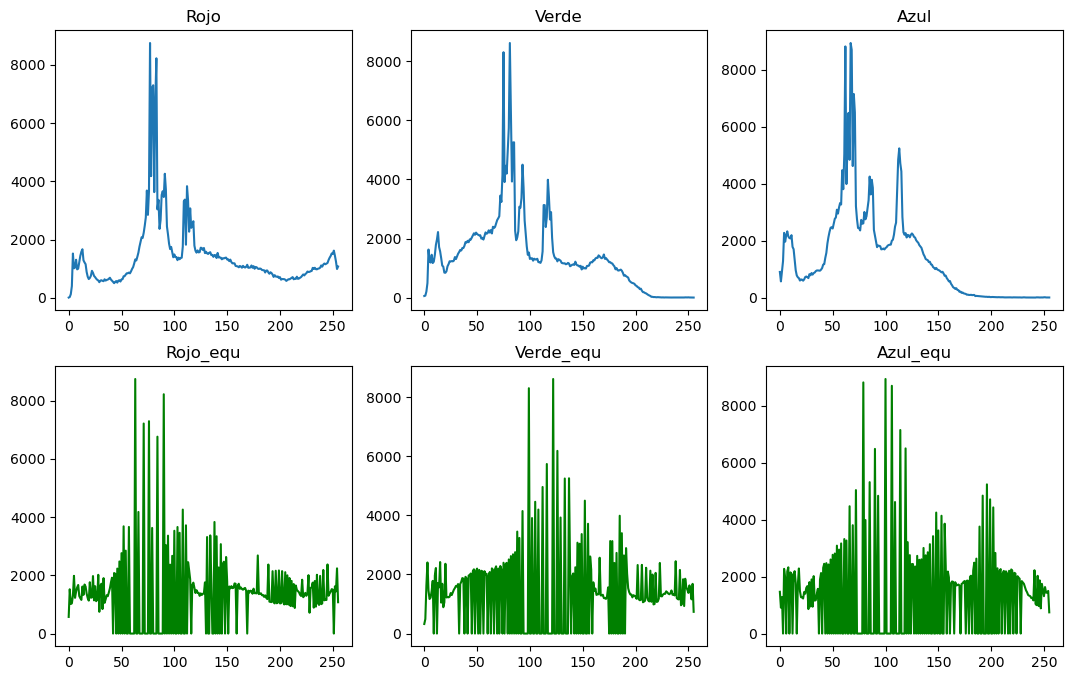

In [ ]:
#Requerimiento 4:

fig, ax = plt.subplots(nrows=2, ncols=3, dpi=100)
fig.set_size_inches(13,8)

ax_antes = ax[0]
ax_despues = ax[1]

RGB_dict = {"Rojo":[ax_antes[0],R_img], "Verde":[ax_antes[1],G_img], "Azul":[ax_antes[2],B_img]}
[
    [  
    RGB_dict[_canal][0].plot(cv2.calcHist([RGB_dict[_canal][1]],[0],None,[256],[0,256])), 
    RGB_dict[_canal][0].set_title(_canal),
    ] 
    for _canal in RGB_dict.keys() 
]

#ECUALIZACION
R_equ = cv2.equalizeHist(R_img)
G_equ = cv2.equalizeHist(G_img)
B_equ = cv2.equalizeHist(B_img)

equ_RGB_dict = {"Rojo_equ":[ax_despues[0],R_equ], "Verde_equ" :[ax_despues[1],G_equ], "Azul_equ":[ax_despues[2],B_equ]}
[
    [  
    #Fill plot
    equ_RGB_dict[_canal][0].plot(cv2.calcHist([equ_RGB_dict[_canal][1]],[0],None,[256],[0,256]), color='g'), 
    equ_RGB_dict[_canal][0].set_title(_canal),
    ] 
    for _canal in equ_RGB_dict.keys() 
]
plt.show()

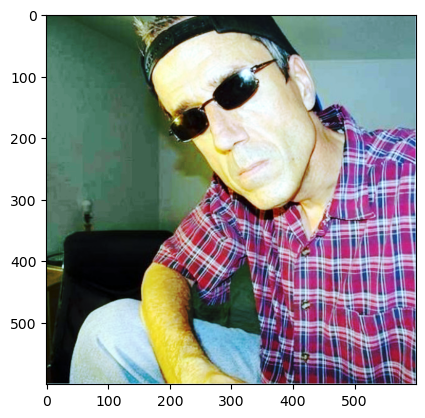

In [ ]:
#Resultado Requerimiento 4:

equ_img = cv2.merge((R_equ,G_equ,B_equ))
plt.imshow(equ_img)

In [ ]:
#Requerimiento 5:
gamma_correction = lambda img, factor: np.uint8(cv2.pow(img/255.0, factor)*255)

fig, ax = plt.subplots(nrows=1, ncols=3, dpi=120)
fig.set_size_inches(10,15)

#Dividir matriz de "Requerimiento 3" con funcion gamma respectiva para cada uno
R_gma, G_gma, B_gma= [gamma_correction(R_img, 0.2),gamma_correction(G_img, 1.5),gamma_correction(B_img, 0.5)]

Gamma_dict = {
    "Rojo_0-2"  :[ax[0],R_gma],
    "Verde_1-5" :[ax[1],G_gma], 
    "Azul_0-5"  :[ax[2],B_gma]
}
[[  
    #Mostrar cada canal en orden RGB en una figura
    Gamma_dict[_canal][0].imshow( Gamma_dict[_canal][1], cmap="gray" ), 
    Gamma_dict[_canal][0].set_title(_canal),

    #Guardar cada canal en un archivo
    cv2.imwrite(f'img_gma_{_canal}.jpg',Gamma_dict[_canal][1])

    ] for _canal in Gamma_dict.keys() 
]
